In [27]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sys
import os.path as osp
from skimage.io import imread
%matplotlib inline

In [202]:
# load refer
ROOT_DIR = '../'
dataset  = 'refcocog'
splitBy  = 'google'
sys.path.insert(0, osp.join(ROOT_DIR, 'pyutils', 'refer'))
REFER_DIR = osp.join(ROOT_DIR, 'data')
from refer import REFER
refer = REFER(REFER_DIR, dataset, splitBy)

loading dataset refcocog into memory...
creating index...
index created.
DONE (t=8.35s)


In [203]:
# load detection results
model_id = '0'
split    = 'val'
result_path = osp.join('../cache/box', dataset+'_'+splitBy, 'model_id'+model_id+'_'+split+'(dets).json')
predictions = json.load(open(result_path))['predictions']

In [204]:
# check detections
predictions[0]

{u'flag': -1,
 u'gd_box': [150.99, 109.15, 152.91, 223.12],
 u'image_id': 147466,
 u'pred_box': [8, 135, 166, 225],
 u'pred_det_id': 20933,
 u'sent_id': 90349}

In [215]:
pred = [pred for pred in predictions if pred['flag'] == -1][23]
pred_box = pred['pred_box']
gd_box   = pred['gd_box']
sent     = refer.Sents[pred['sent_id']]['sent']
image_id = pred['image_id']
file_name = refer.Imgs[image_id]['file_name']
img_path = osp.join('../data/images/mscoco/images/train2014/', file_name)
img = imread(img_path)

518390
a young child looking at the elephants


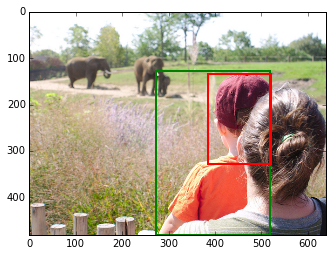

In [216]:
plt.imshow(img)
currentAxis = plt.gca()
color='green'
box = gd_box
coords = (box[0], box[1]), box[2], box[3]
currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))

if pred['flag'] == -1:
    color = 'red'
else:
    color = 'blue'
box = pred_box
coords = (box[0], box[1]), box[2], box[3]
currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
print image_id
print sent